# ЧИСЛЕННОЕ РЕШЕНИЕ

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import metrics

In [3]:
boston = load_boston()

# создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, # данные
    columns=boston.feature_names # наименования столбцов
)

# добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Обучим с помощью градиентного спуска линейную регрессию 

на одном факторе — LSTAT (процент низкостатусного населения) 

— и сравним результат с полученным ранее результатом МНК.

In [4]:
X = boston_data[['LSTAT']] # матрица наблюдений
y = boston_data['MEDV'] # вектор правильных ответов

In [5]:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)

# Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [6]:
print(f'w0: {sgd_lr_lstat.intercept_}') #свободный член w0
print(f'w1: {sgd_lr_lstat.coef_}') #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


Давайте с помощью метода predict() сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию:

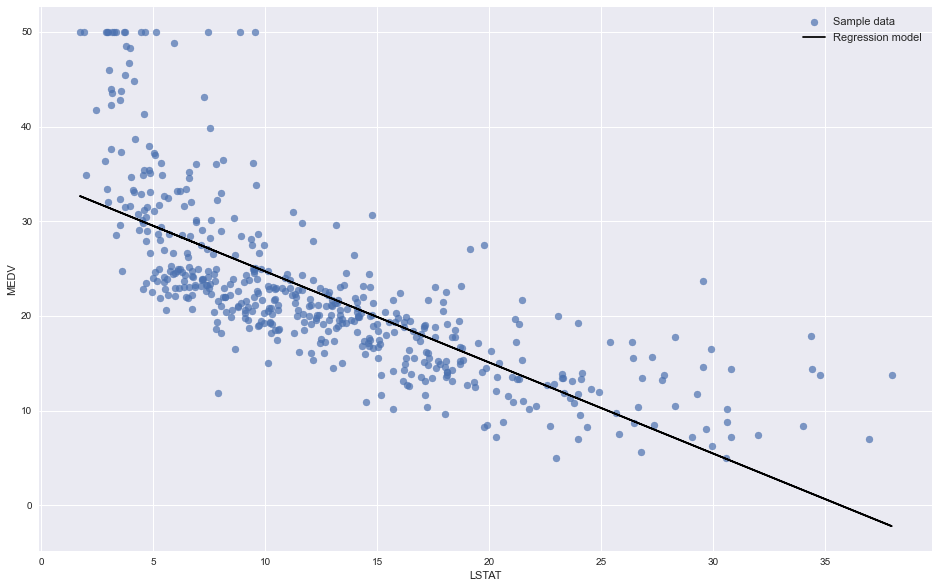

In [7]:
# функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(16, 10)) # фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') # диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') # линейный график
    ax.set_xlabel(xlabel) # название оси абсцисс
    ax.set_ylabel(ylabel) # название оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда
    
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)

# Строим визуализацию
plot_regression_2d(X.to_numpy(), y, y_predict)

In [8]:
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.542


Итоговый  для линейной регрессии, обученной с помощью градиентного спуска, составил 0.542. 

Напомним, для той же модели, обученной с помощью МНК, метрика была равна 0.544. 

То есть доля информации, которую объяснила модель, обученная с помощью градиентного спуска, 

ниже примерно на 0.002. Очевидно, в реальных задачах такая разница не имеет значения. 

# Теперь попробуем обучить многомерную линейную регрессию с помощью SGD. 

Как и раньше составим полную матрицу наблюдений  из всех факторов, которые нам даны. 

Обучим модель и выведем значения коэффициентов в виде DataFrame:

In [9]:
# Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns

# Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

# Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
# Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})

# Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})

coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,215685703967.81
1,ZN,12484461532.48
2,INDUS,7277643519.34
3,CHAS,8306153893.93
4,NOX,-8413828282.21
5,RM,-31481821436.80
6,AGE,86858200781.00
7,DIS,-225614117321.49
8,RAD,-46832080100.29
9,TAX,1892286406.74


Все коэффициенты имеют запредельные значения (9-11 степени числа 10).
 
Это типичная картина расходящегося градиентного спуска: алгоритм не достиг 
точки минимума по каким-то причинам. 

Такие высокие значения коэффициентов означают, что модель является неустойчивой.

In [10]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)

# Рассчитываем коэффициент детерминации
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: -10590303862129979358707712.000


R отрицательный. Да ещё какой! Напомним, отрицательный   говорит о том, что модель абсолютно не описывает зависимости в данных.

В чём же причина? Неужели SGD не справился с поиском 14 параметров (свободный член + 13 коэффициентов при факторах)?

Ответ очень простой — отсутствие масштабирования. 

Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно 

масштабировать данные с помощью нормализации или стандартизации. 

Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

In [11]:
from sklearn import preprocessing
 
# Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()

# Производим стандартизацию
X_scaled = scaler.fit_transform(X)

# Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.42,0.28,-1.29,-0.27,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,0.44,-1.08
1,-0.42,-0.49,-0.59,-0.27,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,0.44,-0.49
2,-0.42,-0.49,-0.59,-0.27,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,0.40,-1.21
3,-0.42,-0.49,-1.31,-0.27,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,0.42,-1.36
4,-0.41,-0.49,-1.31,-0.27,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,0.44,-1.03


# Попытка №2. Обучим модель и составим таблицу из её параметров:

In [12]:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

# Обучаем модель — ищем параметры по методу SGD
# Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
# Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})

# Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,-0.87
1,ZN,0.95
2,INDUS,-0.12
3,CHAS,0.73
4,NOX,-1.89
5,RM,2.76
6,AGE,-0.03
7,DIS,-3.05
8,RAD,1.96
9,TAX,-1.31


In [13]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X_scaled)

# Рассчитываем коэффициент детерминации
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.740


Найдите в документации параметр, отвечающий на критерий остановки (по умолчанию он равен 0.001).

Обучите SGDRegressor на датасете о домах в Бостоне с параметром остановки, равным 0.1, и random_state = 42. 

Остальные параметры оставьте по умолчанию.

Рассчитайте коэффициент детерминации . 

Ответ округлите до третьего знака после точки-разделителя. 

Сделайте вывод по полученным результатам.

In [14]:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42, tol=0.1)

# Обучаем модель — ищем параметры по методу SGD
# Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)

SGDRegressor(random_state=42, tol=0.1)

In [15]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X_scaled)

# Рассчитываем коэффициент детерминации
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.735
